# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

number = 1

city_name = []

city_lat = []

city_lng = []

city_temp = []

city_humid = []

city_clouds = []

city_wind = []

print("Beginning Data Retrieval  ")

print("--------------------------")

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        city_lat.append(city_data['coord']['lat'])
        city_lng.append(city_data['coord']['lon'])
        city_temp.append(city_data['main']['temp'])
        city_humid.append(city_data['main']['humidity'])
        city_clouds.append(city_data['clouds']['all'])
        city_wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | City not found. Skipping this one...')
        number = number + 1
        
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")


# city_data = []

# print("Beginning Data Retrieval  ")

# print("--------------------------")

# record_count = 1

# set_count = 1

# for i, city in enumerate(cities):
    
#     if (i % 50 == 0 and i >= 50):
        
#         set_count += 1
        
#         record_count = 0
        
#     city_url = url + "&q=" = city
    
#     print("Processing Record %s of set %s | %s" % (record_count, set_count, city))
    
#     record_count += 1
    
#     try:
        
#         city_weather = requests.get(city_url).json()
        
#         city_lat = city_weather["coord"]["lat"]
        
#         city_lng = city_weather["coord"]["lon"]
        
#         city_max_temp = city_weather["main"]["temp_max"]
        
#         city_humidity = city_weather["main"]["humidity"]
        
#         city_clouds = city_weather["clouds"]["all"]
        
#         city_wind = city_weather["wind"]["speed"]
        
#         city_country = city_weather["sys"]["country"]
        
#         city_date = city_weather["dt"]
        
#         city_data.append({"City": city,
#                          "Lat": city_lat,
#                          "Lng": city_lng,
#                          "Max Temp": city_max_temp,
#                          "Humidity": city_humidity,
#                          "Cloudiness": city_clouds,
#                          "Wind Speed": city_wind,
#                          "Country": city_country,
#                          "Date": city_date})
        
#     except:
#         print("City not found. Skipping this one...")
#         pass
    
# print("--------------------------")
# print("Data Retrieval Complete   ")
# print("--------------------------")
        
        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame({"City": city_name,
                             "Latitude": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_temp,
                             "Humidity": city_humid,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind})

pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bay Saint Louis,30.3088,-89.3300,42.42,87,1,6.35
1,Ushuaia,-54.8000,-68.3000,42.80,75,75,16.11
2,Marsá Maţrūḩ,31.3525,27.2453,55.40,62,40,12.66
3,Bluff,-46.6000,168.3333,54.09,74,0,15.30
4,Emerald,-23.5333,148.1667,94.57,24,75,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_df.describe()

,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,20.469125,16.204351,47.802272,72.545624,51.627561,8.518343
std,33.753634,91.688443,34.086902,19.652918,39.516233,5.784895
min,-54.800000,-179.166700,-43.040000,16.000000,0.000000,0.270000
25%,-7.950000,-63.598600,28.580000,65.000000,7.000000,4.070000
50%,25.716700,20.744700,58.480000,77.000000,53.000000,7.050000
75%,48.383500,92.066700,74.320000,86.000000,90.000000,11.500000
max,78.218600,178.416700,109.400000,100.000000,100.000000,33.380000


In [8]:
#  Get the indices of cities that have humidity over 100%.
dirty_data = city_data_df[(city_data_df["Humidity"] > 100)].index

dirty_data

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_data = city_data_df.drop(dirty_data, inplace=False)
clean_data.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bay Saint Louis,30.3088,-89.3300,42.42,87,1,6.35
1,Ushuaia,-54.8000,-68.3000,42.80,75,75,16.11
2,Marsá Maţrūḩ,31.3525,27.2453,55.40,62,40,12.66
3,Bluff,-46.6000,168.3333,54.09,74,0,15.30
4,Emerald,-23.5333,148.1667,94.57,24,75,9.22


In [22]:
lats = clean_data["Latitude"]
max_temps = clean_data["Max Temp"]
humidity = clean_data["Humidity"]
cloudiness = clean_data["Cloudiness"]
wind_speed = clean_data["Wind Speed"]

clean_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

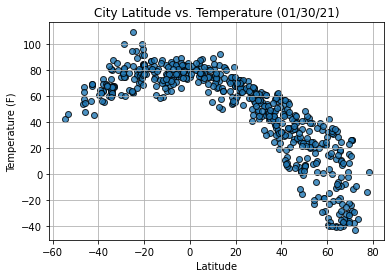

In [23]:

plt.scatter(lats, 
            city_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs. Temperature (%s)'% time.strftime("%x"))

plt.ylabel("Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("output_data/Fig1.png")
          
plt.show()

## Latitude vs. Humidity Plot

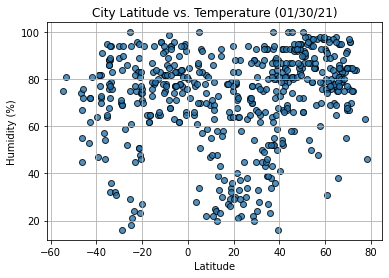

In [24]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title('City Latitude vs. Temperature (%s)'% time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("output_data/Fig2.png")
          
plt.show()

## Latitude vs. Cloudiness Plot

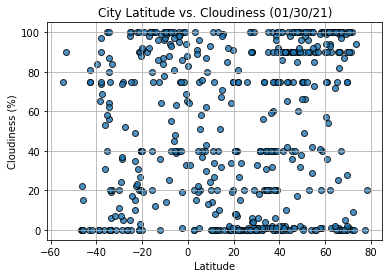

In [25]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

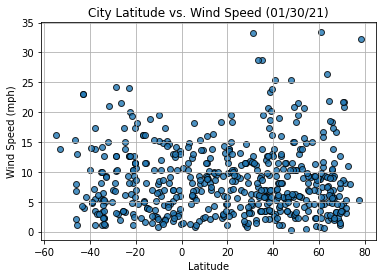

In [26]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


plt.savefig("output_data/Fig4.png")


plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression